# Synthetic Minority Over-sampling technique
finds out nearest sample for every sample of minority class (in this case rejected)

## Nearest neighbor concept
#### if k =1 then joins the point to the nearest another point
#### if k =2 then joins the point to two of the nearest points
#### if k =3 then joins the point to three of the nearest  points

then artificially generate points on these lines from nearest neighbor

In [28]:
!pip install imblearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 574.4 kB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near fu

In [31]:
from imblearn.over_sampling import SMOTE


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df= pd.read_csv("loan_final.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
n_rows, n_columns = df.shape
print('number of rows', n_rows)
print('number of columns', n_columns)


number of rows 4269
number of columns 13


In [7]:
#Get count of number of M or B cells in diagnosis
df['status'].value_counts()

 Approved    2656
 Rejected    1613
Name: status, dtype: int64

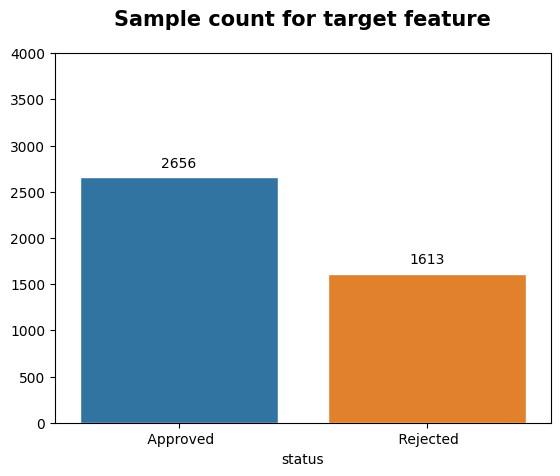

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= "status",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 4000)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for preprocessing
loan_data_preprocessed = df.copy()

# Initialize label encoders for categorical variables
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_status = LabelEncoder()

# Encode categorical variables
loan_data_preprocessed[' education'] = le_education.fit_transform(loan_data_preprocessed[' education'])
loan_data_preprocessed[' self_employed'] = le_self_employed.fit_transform(loan_data_preprocessed[' self_employed'])
loan_data_preprocessed['status'] = le_status.fit_transform(loan_data_preprocessed['status'])


In [10]:
loan_data_preprocessed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [11]:
X= loan_data_preprocessed.drop(["loan_id", "status"], axis= "columns")

In [16]:
X.shape

(4269, 11)

In [15]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [13]:
Y= loan_data_preprocessed["status"]

Y.head()

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [17]:
Y.shape

(4269,)

## Preprocessing
#### 1. Split into train test
#### 2. Standardization

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.2, random_state= 42)

In [20]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [21]:
test_array = np.array(Y_test)
print(test_array)

[1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 

In [22]:
test_array.shape

(854,)

# Before Applying SMOTE
## Approved - 2120
## Rejected - 1295

In [35]:


unique, count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 2120, 1: 1295}

In [36]:
from imblearn.over_sampling import SMOTE

# Adjusting the parameter name from 'ratio' to 'sampling_strategy'
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_res, Y_train_res = sm.fit_resample(X_train_scaled, Y_train)


In [37]:
unique, count = np.unique(Y_train_res,return_counts = True)
Y_train_res_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_res_dict_value_count

{0: 2120, 1: 2120}

# After Applying SMOTE
## Approved - 2120
## Rejected - 2120

## Resampled data X_train_res and Y_train_res

# LOGISTIC REGRESSION code from here

# Before Parameter tuning

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [55]:
model.fit(X_train_res, Y_train_res)

LogisticRegression()

In [56]:
predictions = model.predict(X_test_scaled)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, predictions)
classification_report = classification_report(Y_test, predictions)
confusion_matrix = confusion_matrix(Y_test, predictions)

In [58]:
print(accuracy)

0.9086651053864169


In [59]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       536
           1       0.85      0.91      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854



In [60]:
confusion_matrix

array([[486,  50],
       [ 28, 290]])

## Before parameter tuning accuracy= 0.908

# Hyper parameter tuning using GridSearchCV

In [62]:
# Hyper parameter tuning and cross validation for the Logistic Regression model

from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(LogisticRegression(max_iter=1000), {
    'C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'] 
}, cv=5, return_train_score=False)

grid.fit(X_train_res,Y_train_res)
grid = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)
grid[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']].head()

,param_C,param_penalty,param_solver,mean_test_score,rank_test_score
9,0.1,l1,liblinear,0.936792,1
4,0.01,l2,lbfgs,0.936085,2
6,0.01,l2,newton-cg,0.936085,2
7,0.01,l2,newton-cholesky,0.936085,2
13,0.1,l2,liblinear,0.935613,5


## Best parameters were C=0.1, penalty='l1', solver='liblinear'

In [79]:
# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#  X, Y are feature and target variables

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with best parameters
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
LR_best.fit(X_train_res, Y_train_res)

# Make predictions on the test set
Y_pred = LR_best.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

#print accuracy
accuracy_tuning = accuracy_score(Y_test, Y_pred)
print(accuracy_tuning)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[485  51]
 [ 20 298]]
0.9168618266978923
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       536
           1       0.85      0.94      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854



# After parameter tuning accuracy = 0.9168

# Confusion Matrix

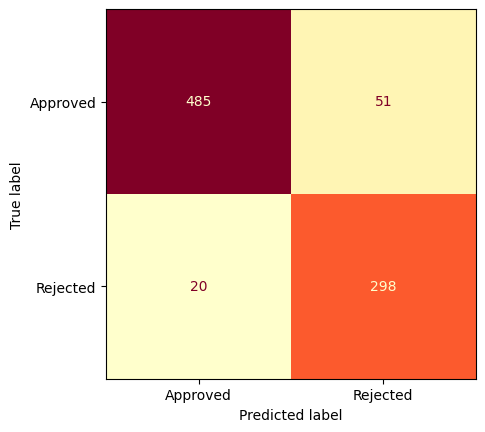

In [81]:
# Visualize the confusion matrix
category=['Approved', 'Rejected']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category)
disp = disp.plot(cmap=plt.cm.YlOrRd, colorbar=False)
plt.show()

# AUC this is gives the measure of the model independent to the threshold used for classification

AUC: 0.9311868769087459


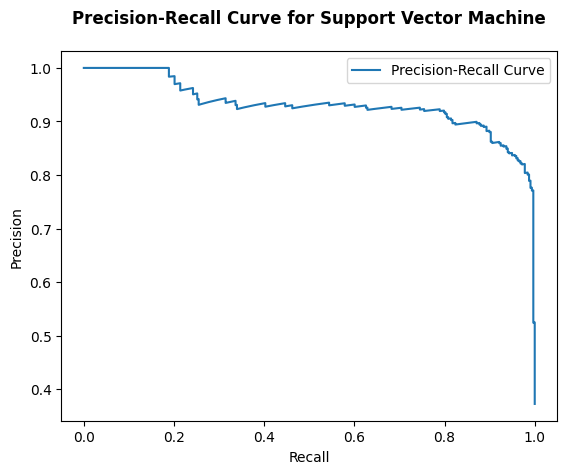

In [82]:
from sklearn.metrics import precision_recall_curve, auc
# Obtain predicted probabilities for the positive class
Y_proba = LR_best.predict_proba(X_test_scaled)[:, 1]
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
# Plot the precision-recall curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine',pad= 20, fontweight= "bold")
plt.legend()
plt.show()

In [83]:
incorrect_predictions = X_test[Y_test != Y_pred]
print("Incorrect predictions:", incorrect_predictions)

Incorrect predictions:        no_of_dependents   education   self_employed   income_annum  \
1130                  1           1               0         300000   
3402                  3           1               1        9200000   
3624                  1           1               1         800000   
3490                  1           0               0        4700000   
315                   4           0               0        4400000   
...                 ...         ...             ...            ...   
1456                  4           0               1        1500000   
1812                  5           1               0        9000000   
1288                  3           1               0        5900000   
1237                  2           1               1        9500000   
1539                  4           1               1        1500000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
1130       1200000           4           342                 

In [84]:
incorrect_predictions.shape

(71, 11)

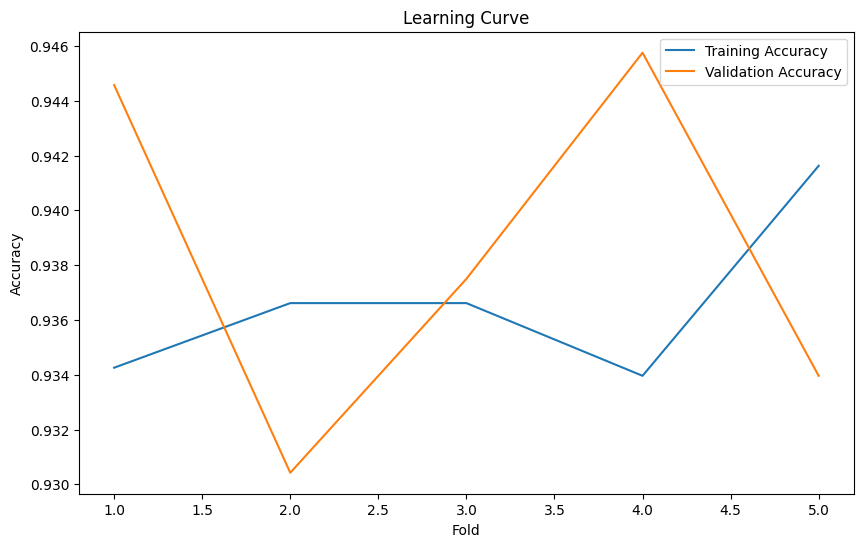

Confusion Matrix:
 [[1944  176]
 [  92 2028]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2120
           1       0.92      0.96      0.94      2120

    accuracy                           0.94      4240
   macro avg       0.94      0.94      0.94      4240
weighted avg       0.94      0.94      0.94      4240



In [88]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling using SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_res, Y_train_res = sm.fit_resample(X_train_scaled, Y_train)

# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)

# Initialize KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(X_train_res):
    # Create training and validation subsets
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    Y_train_fold, Y_val_fold = Y_train_res[train_index], Y_train_res[val_index]

    # Train the Logistic Regression model on the fold
    LR_best.fit(X_train_fold, Y_train_fold)

    # Calculate training and validation accuracy
    train_accuracy = LR_best.score(X_train_fold, Y_train_fold)
    val_accuracy = LR_best.score(X_val_fold, Y_val_fold)

    # Store the results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(1, 6), val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Correct use of cross_val_predict on resampled data
Y_pred_cv = cross_val_predict(LR_best, X_train_res, Y_train_res, cv=5)  

# Calculate confusion matrix and classification report on resampled training data
conf_matrix = confusion_matrix(Y_train_res, Y_pred_cv)
class_report = classification_report(Y_train_res, Y_pred_cv)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


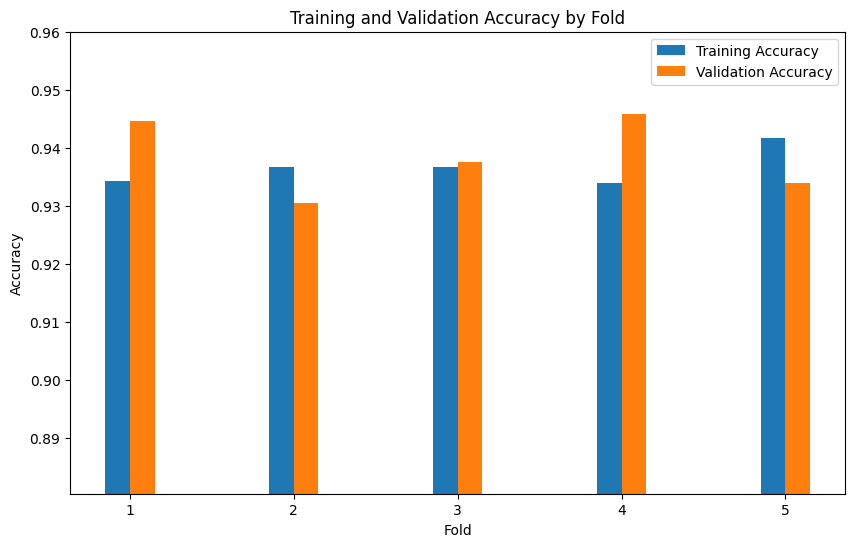

In [89]:

# Assuming train_accuracies and val_accuracies are filled as before
folds = np.arange(1, 6)  # Folds ranging from 1 to 5

# Calculate the minimum and maximum accuracy values across both training and validation accuracies
min_accuracy = min(min(train_accuracies), min(val_accuracies))
max_accuracy = max(max(train_accuracies), max(val_accuracies))

# Expand the range slightly to ensure all bars are comfortably within the plot area
min_lim = max(0, min_accuracy - 0.05)  # Ensure minimum is not less than 0
max_lim = min(0.96, max_accuracy + 0.05)  # Ensure maximum is not more than 1

plt.figure(figsize=(10, 6))

# Adjust the width for clarity
width = 0.15

# Plotting both the training and validation accuracies as bar charts
plt.bar(folds - width/2, train_accuracies, width, label='Training Accuracy')
plt.bar(folds + width/2, val_accuracies, width, label='Validation Accuracy')

# Setting the y-axis to focus on the range of interest
plt.ylim([min_lim, max_lim])

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Fold')
plt.xticks(folds)

# Adding a legend
plt.legend(loc='best')

plt.show()

# -----------------------------

# SVM code from here